## Preparação dos Dados

### Explicação inicial do Dataset e Objetivo Inicial

<b>Explicação Inicial: </b>Supercondutores tem adquirido significativo reconhecimento nos últimos anos por suas importantes propriedades e por serem úteis em diversas aplicações em todas as áreas do conhecimento, em especial, no estudo das ciências de materiais, mas não apenas nisso, supercondutores também se aplicam as ciências da vida, um bom exemplo seria as imagens por ressonancia magnética muito utilizadas na medicina. Por definição [1], a supercondutibilidade é uma propriedade física de característica intrínseca de certos materiais que, quando resfriados a temperaturas extremamente baixas, tendem a conduzir corrente elétrica sem, ou com muito baixa resistência e perdas, ocasionando campos de fluxo magnéticos que saem do metal. De fato são materiais com propriedades incríveis, porém suas aplicações tem se tornado difíceis por dois principais motivos, sendo o principal deles que:

*apenas apresentam essas propriedades ao atingir ou abaixo de sua respectiva temperatura crítica*

o que por sua vez implica o segundo impasse

*que supercondutores devem ser refriados a temperaturas próximas a temperatura de liquefação do Nitrogênio para serem utilizados*

A partir dessas informações, torna-se clara a importancia do estudo da relação entre as propriedades do supercondutor com sua temperatura crítica. Para isso utilizamos um dataset disponibilizado originalmente pela *"Superconducting
Material Database maintained by Japan’s National Institute for Materials Science (NIMS)"* [2], por intermédio da plataforma *Kaggle* [3], O dataset possui importantes propriedades de diferentes supercondutores (como por exemplo: Massas atômicas, Primeira Energia de Ionização, Raio Atômico, dentr outros..)

<b>Objetivo:</b> Utilizar recursos de Aprendizado de máquina para prever com base nas propriedades de diversos supercodutores, sua temperatura crítica, documentar os processos através de notebooks e uma apresentação final do projeto (artigo, poster ou apresentação)


<b>OBS:</b> Considerando que nosso dataset escolhido não possui dados do tipo categorico, não efetuamos as conversões simbólico-numérica

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
superconductors_dataset = pd.DataFrame(pd.read_csv("train.csv"))

In [3]:
superconductors_dataset

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


### O que cada coluna representa

In [4]:
superconductors_dataset.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

As colunas do dataset foram dividios em 8 principais colunas e suas derivaçãoes, sendo as variáveis principais, *Atomic mass, First Ionization Energy, Density, Eletron Affinity, Fusion Heat, Thermal Conductivity, Valence*, OBS: Tabela retirada do artigo base para o dataset [5]

<img src="Tabela_var_principais.png">

Cada uma das variáveis acima, serviu como base para a crição de suas derivadas, o que incluiu diversos tipos de ferramentas estatísticas, como Média Simples, Média ponderada, Média Geometrica, dentre outras. OBS: Tabela retirada do artigo base para o dataset [5]

<img src="Tabela_var_deriva.png">

Retornando um total de aproximadamente 82 colunas dividas entre *features* e *targets*

### Análise estatística

In [5]:
superconductors_dataset

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [6]:
superconductors_dataset.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [7]:
superconductors_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

Na coluna acima percebe-se que todos os as colunas do dataset (sem excessão) possuem dados númericos, podendo serem eles inteiros (int64) ou decimais (float64) que detém a maior parte dos dados.

In [8]:
lista = np.array(superconductors_dataset.isna().any())
lista

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

A partir da função acima podemos verificar que não há qualquer valor nulo no dataset

### Análise correlação

<AxesSubplot: >

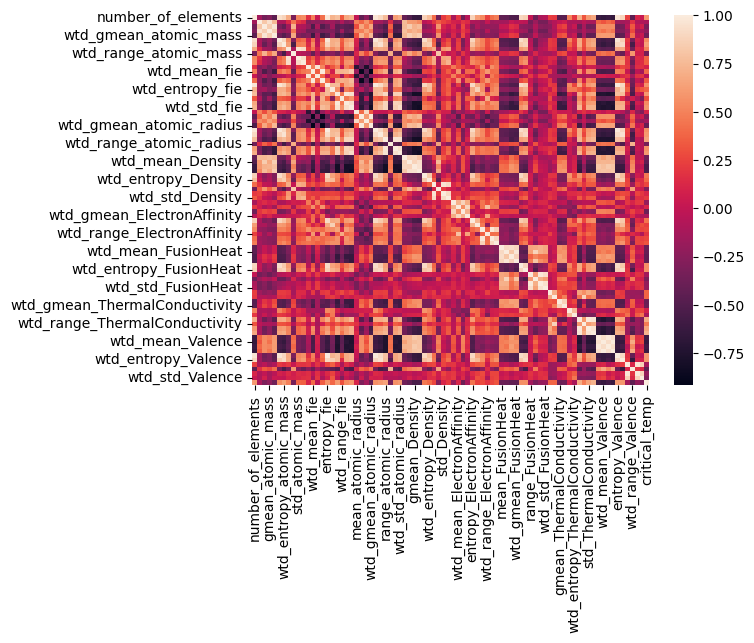

In [9]:
corr_btw_var = superconductors_dataset.corr()
sns.heatmap(corr_btw_var)

Como pode ser visto acima, o plot de correlação entre todas as variáveis nos retorna um heatmap muito extenso e complicado para entender, para uma melhor compreensão, dividimos o dataset entre os 8 tipos de variáveis

In [10]:
def corr_unique(fim):
    escolhidos = list() #lista para gerar novo datarame
    for indice, valor in list(enumerate(superconductors_dataset.columns.str.endswith(fim))): #for na lista com tupla indice e true or false se termina ou não
        if valor == True:
            escolhidos.append(superconductors_dataset.columns[indice]) #pega o elemento com mesmo indice na lista de colunas coluna original
    superconductors_unique = superconductors_dataset.reindex(escolhidos, axis=1)
    return superconductors_unique

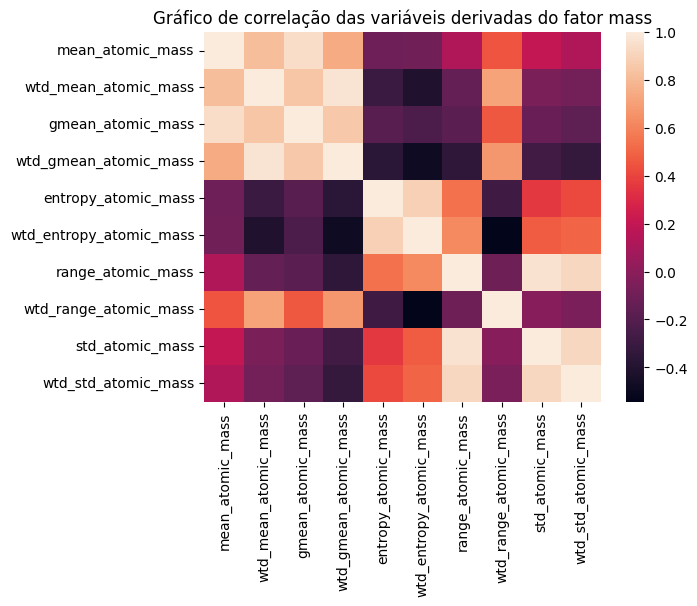

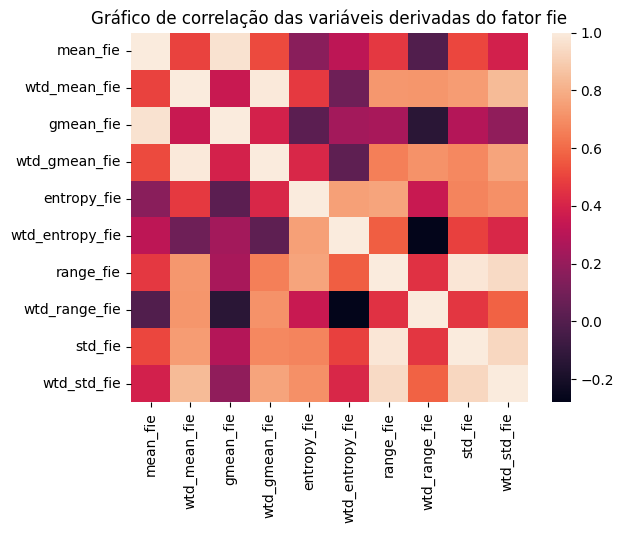

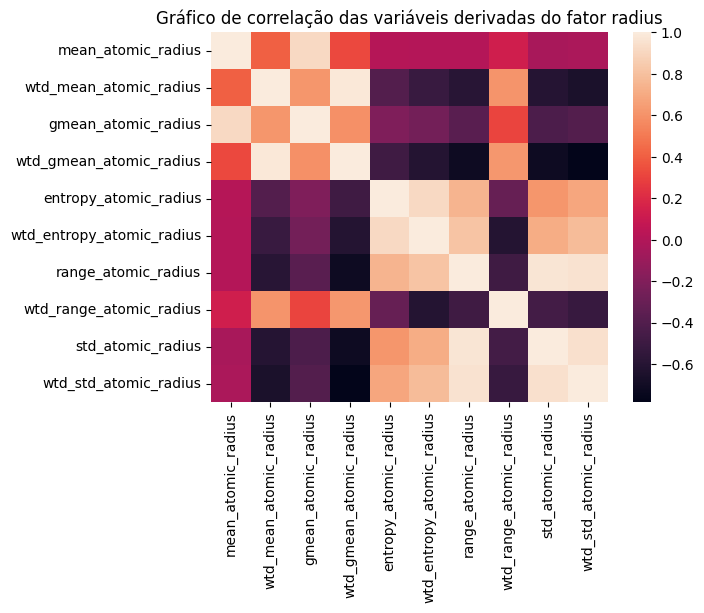

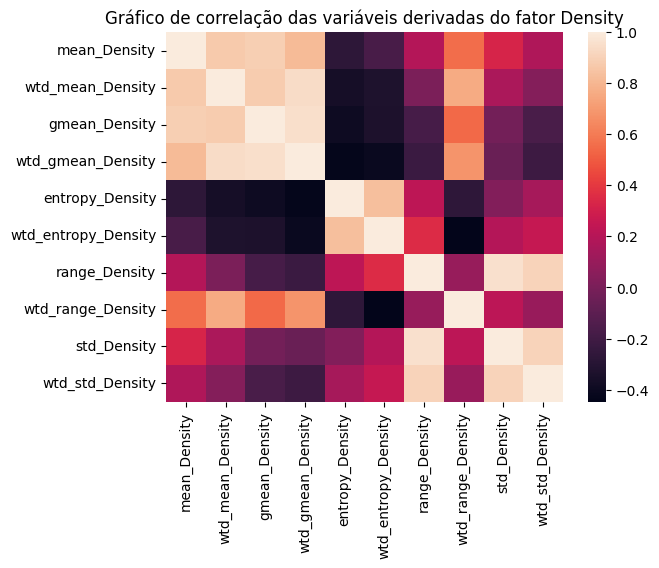

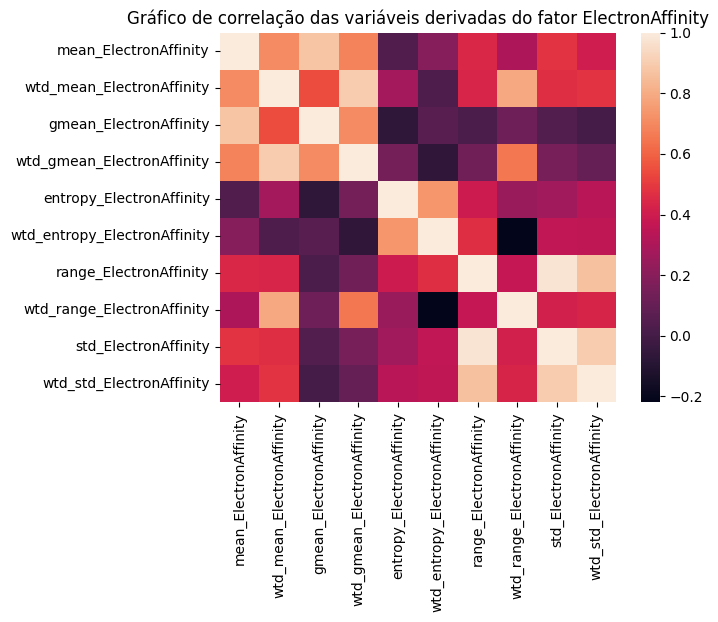

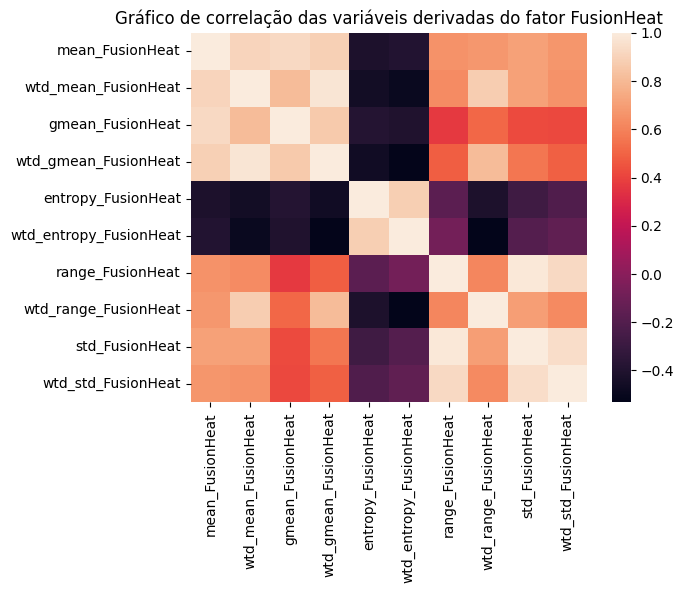

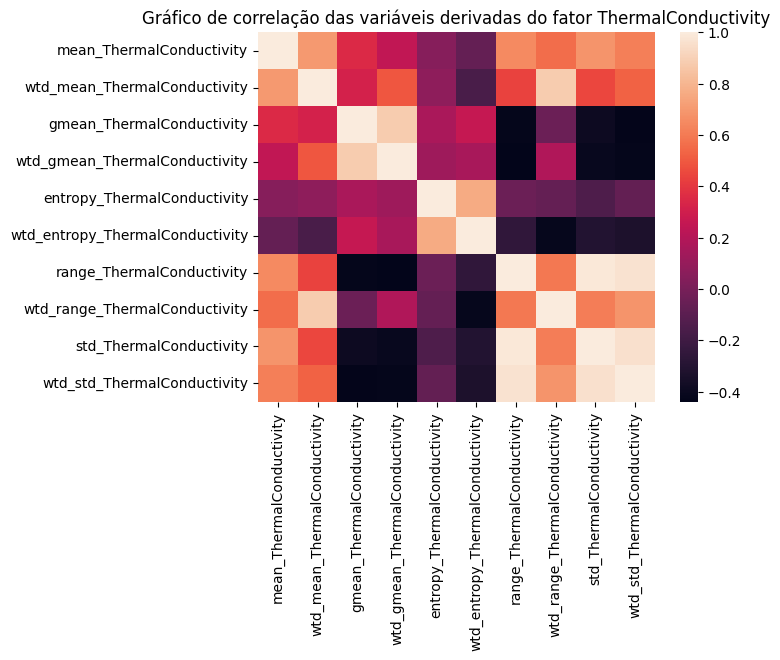

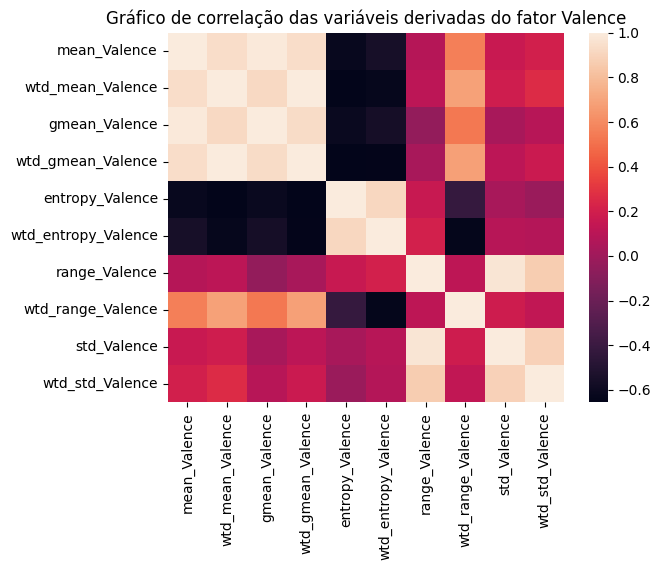

In [11]:
important_vars = ["mass", "fie", "radius", "Density", "ElectronAffinity", "FusionHeat", "ThermalConductivity", "Valence"]
for var in important_vars:
    plt.figure()
    superconduct_var = corr_unique(var)
    corr_supercon_var = superconduct_var.corr()
    sns.heatmap(corr_supercon_var)
    plt.title(f"Gráfico de correlação das variáveis derivadas do fator {var}")

### Histogramas

C:\Users\mayllon23025\AppData\Local\Temp\ipykernel_27992\2687106487.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


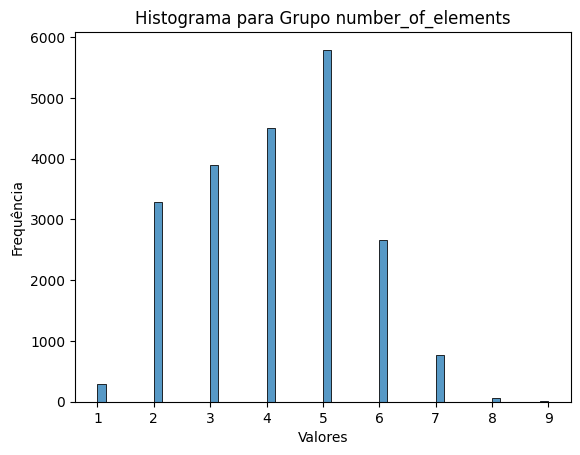

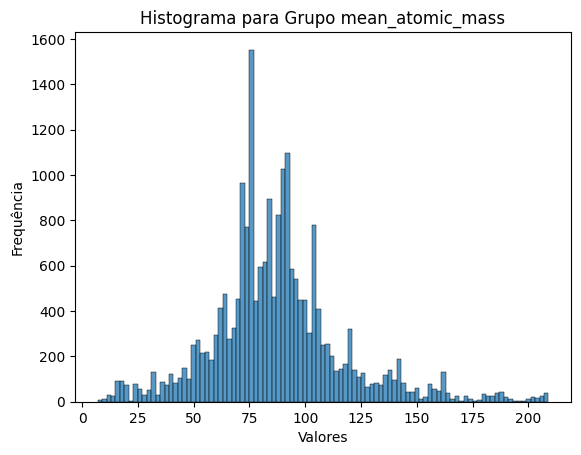

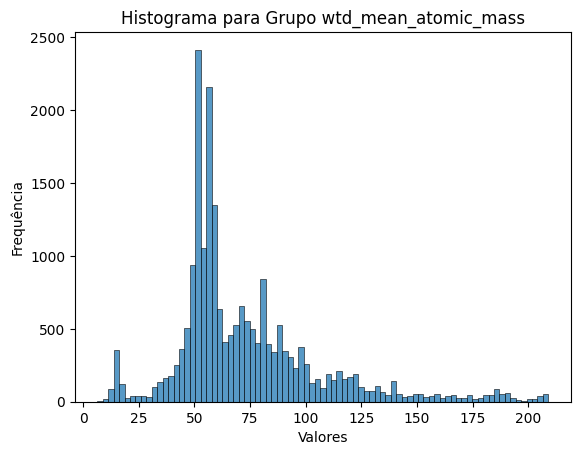

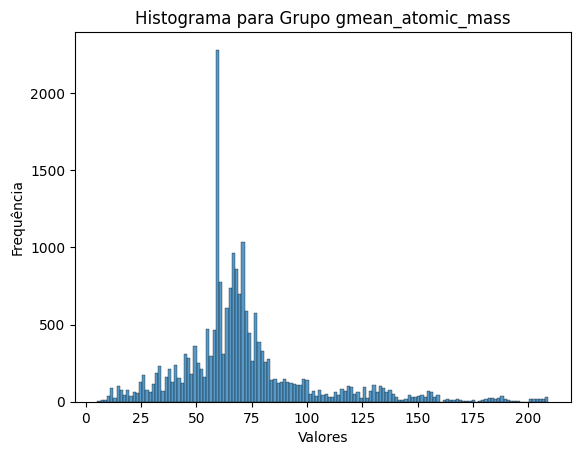

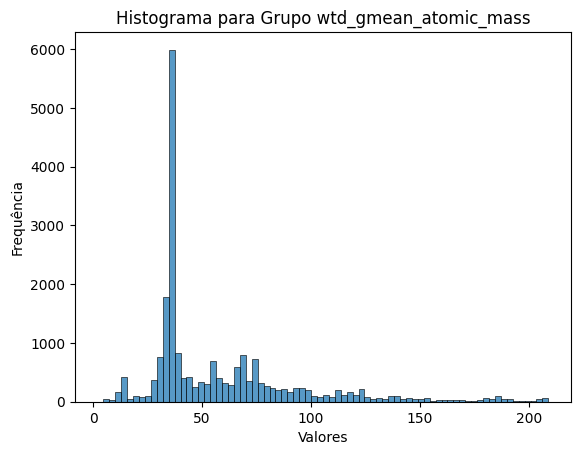

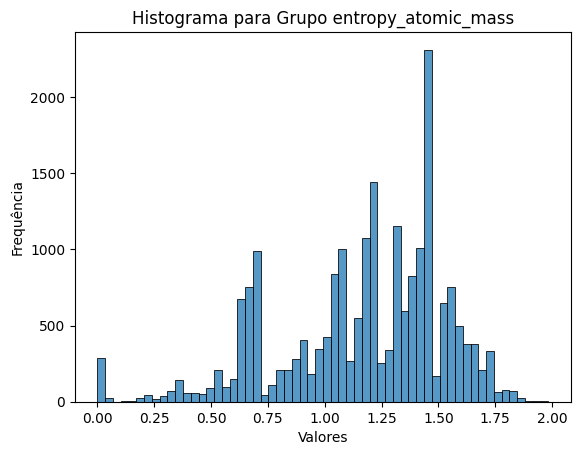

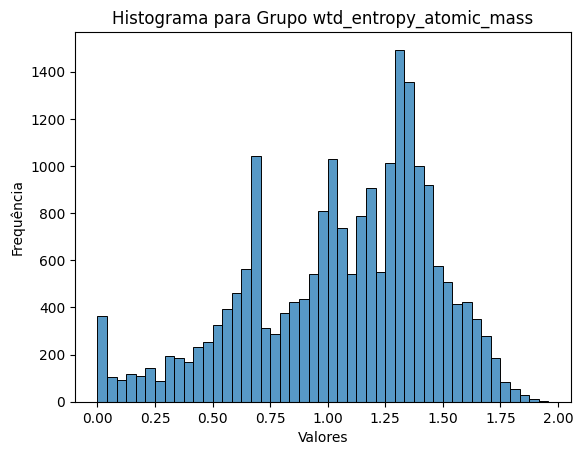

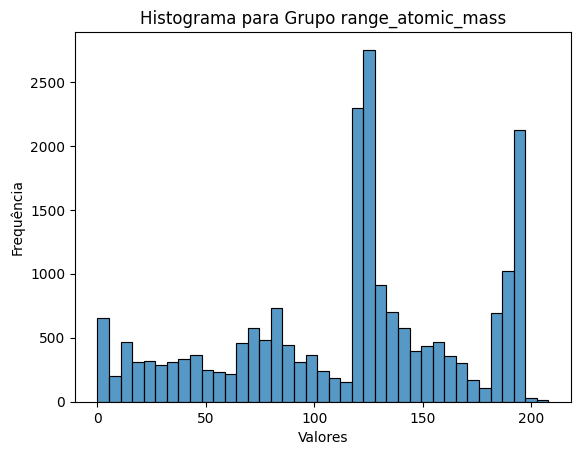

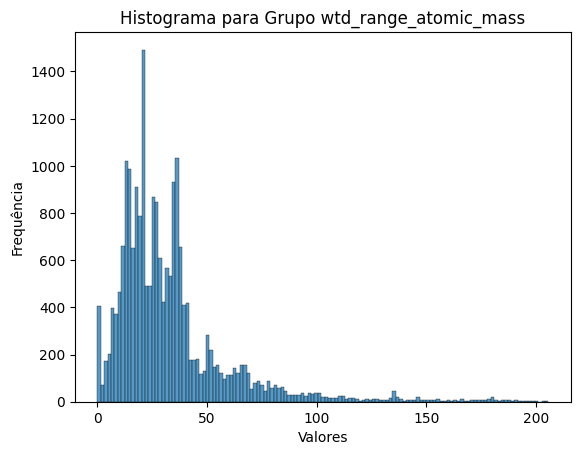

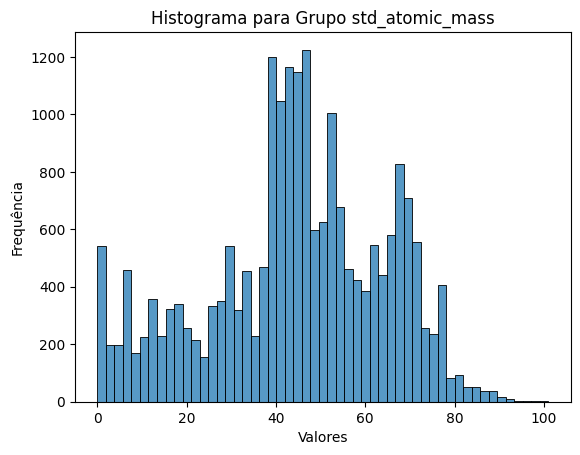

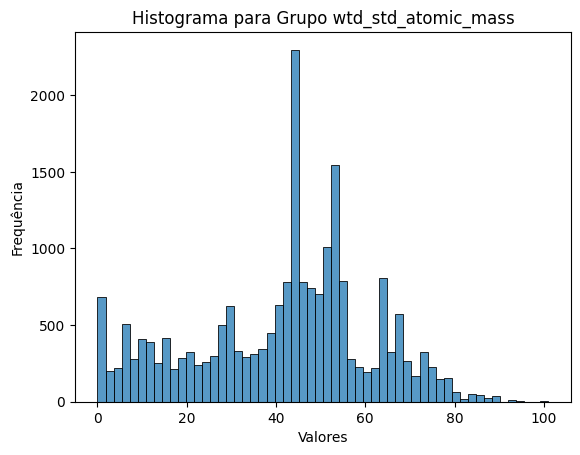

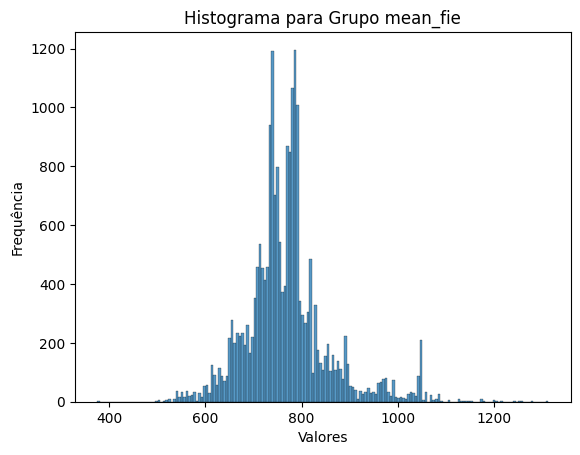

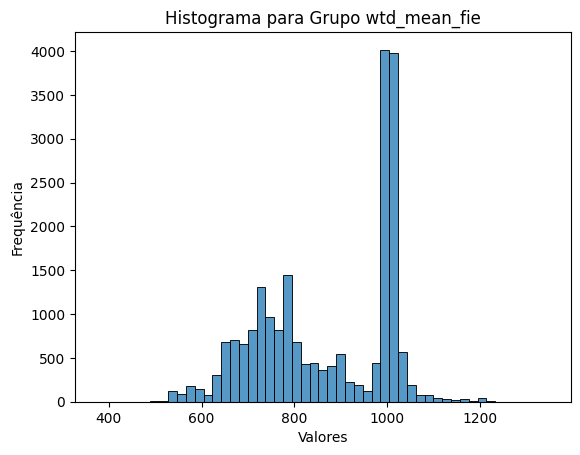

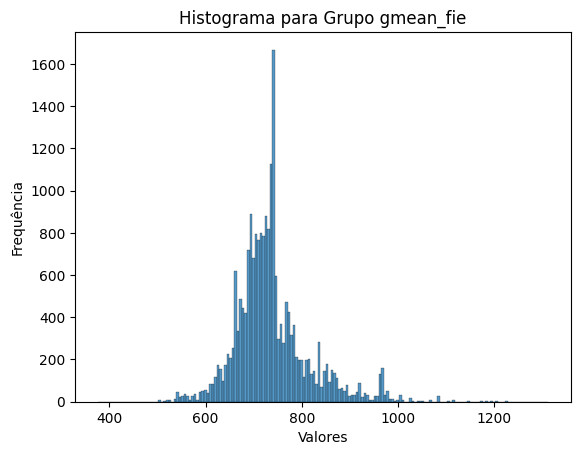

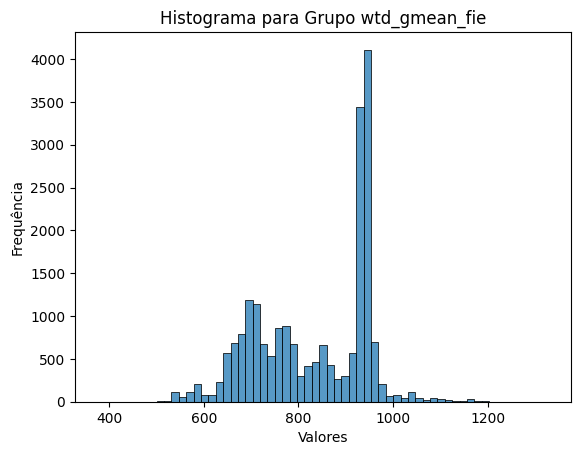

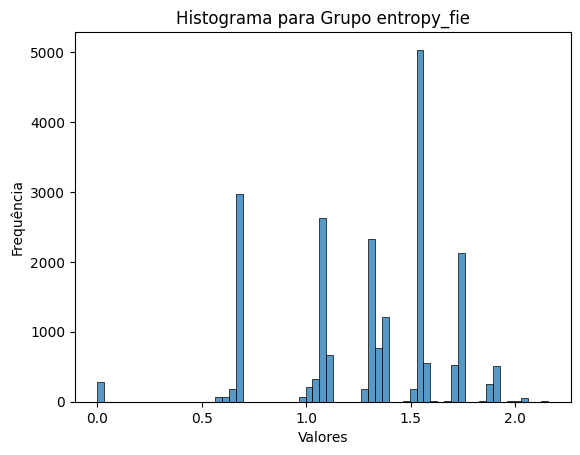

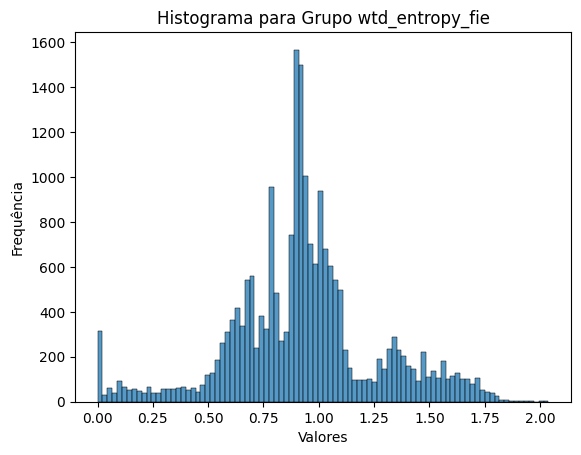

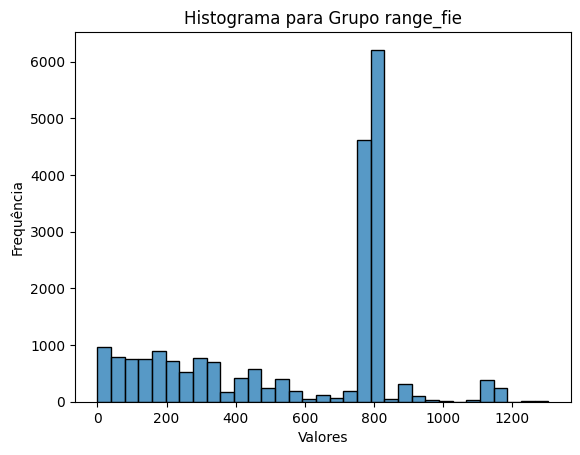

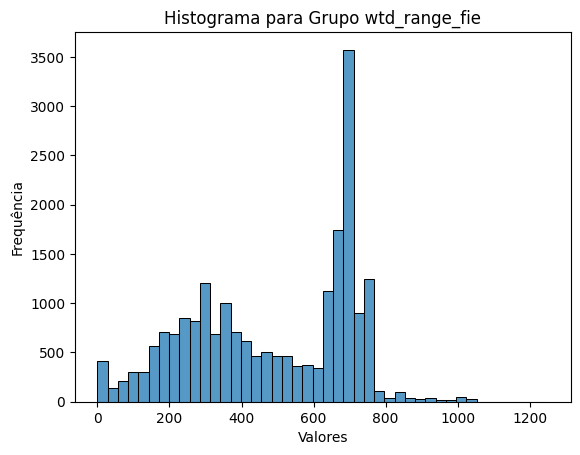

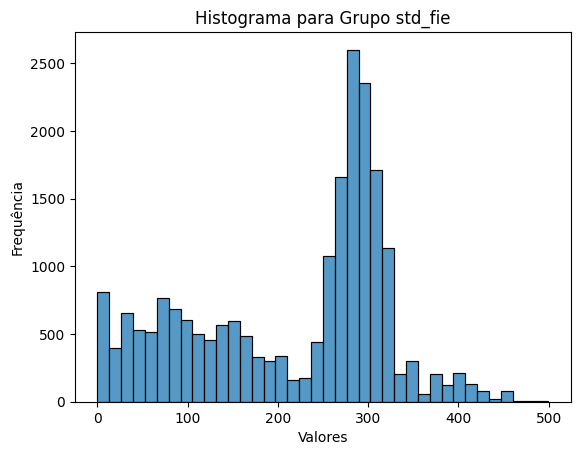

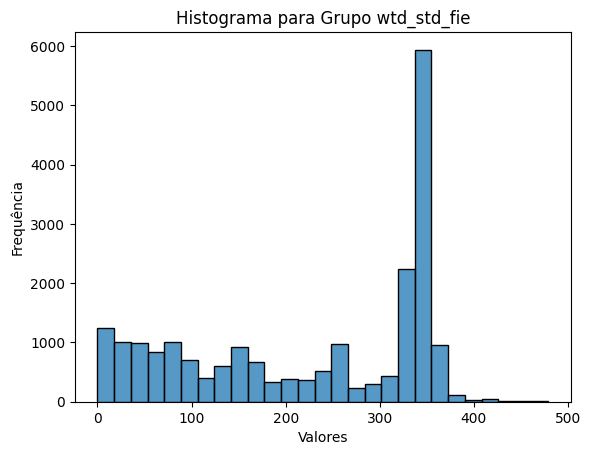

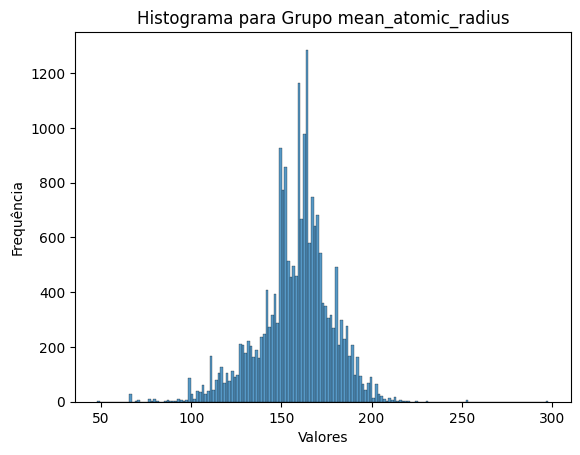

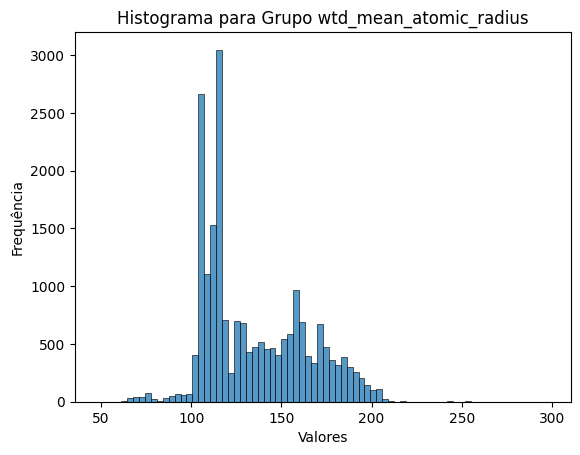

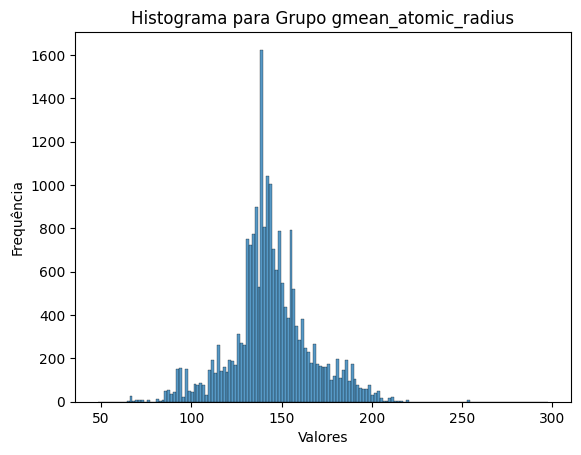

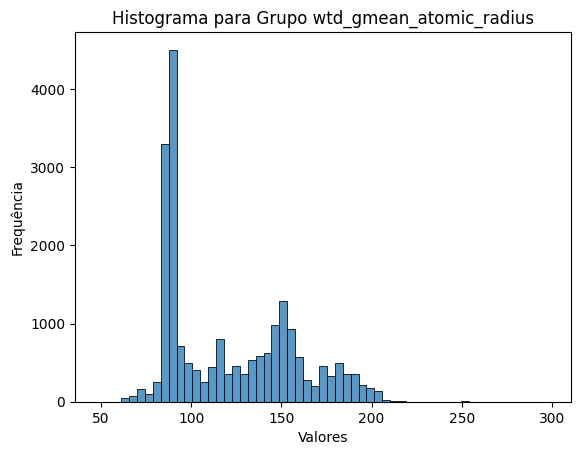

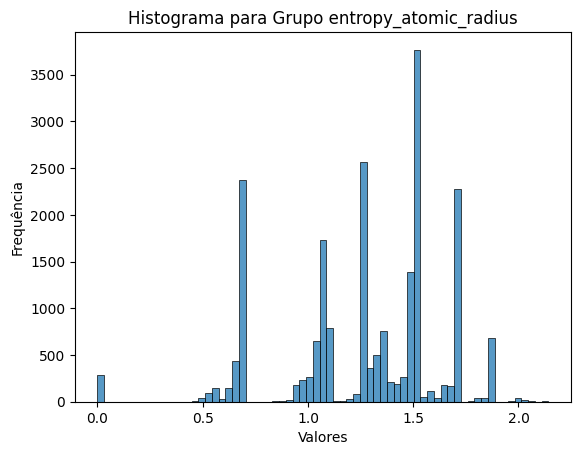

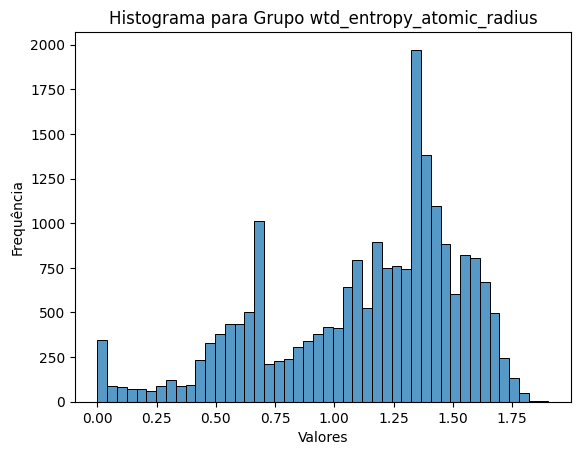

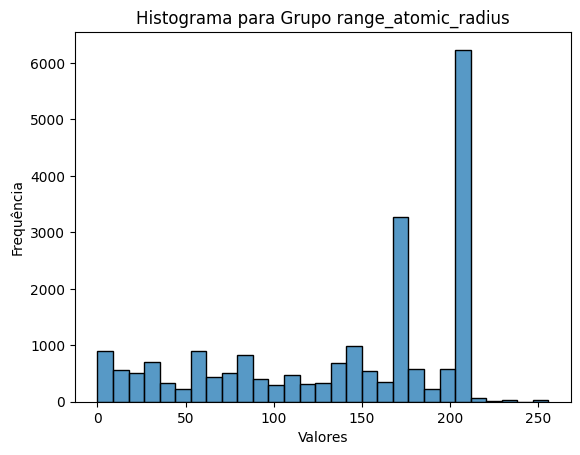

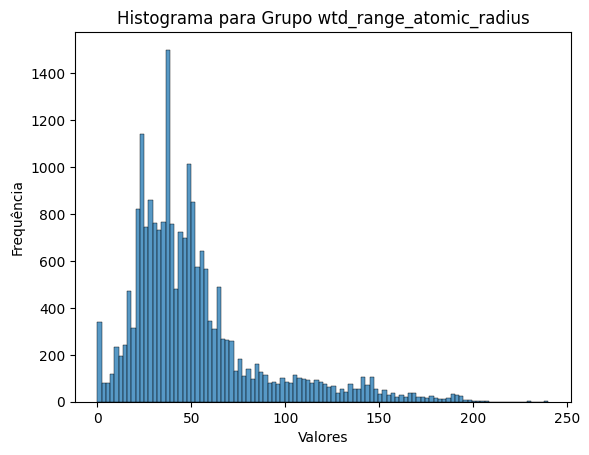

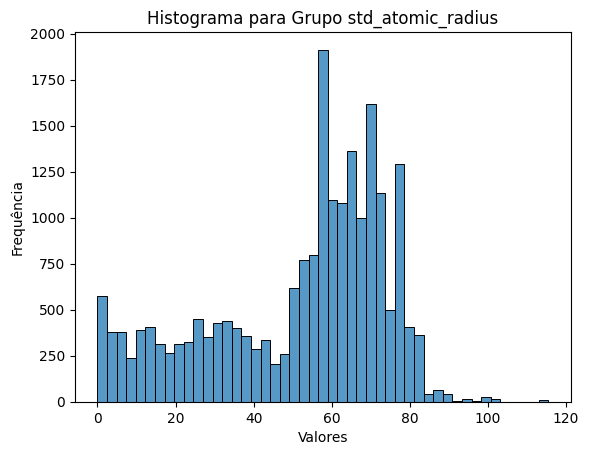

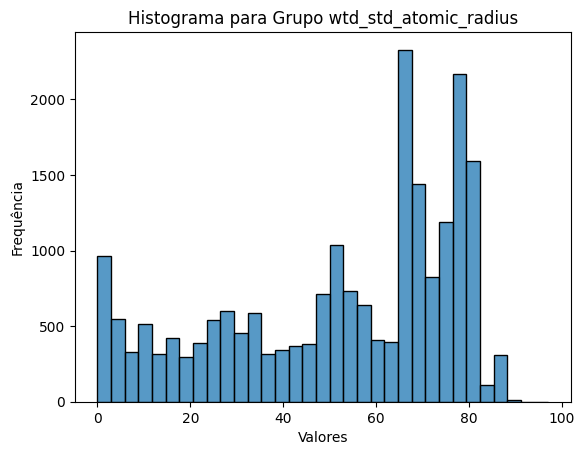

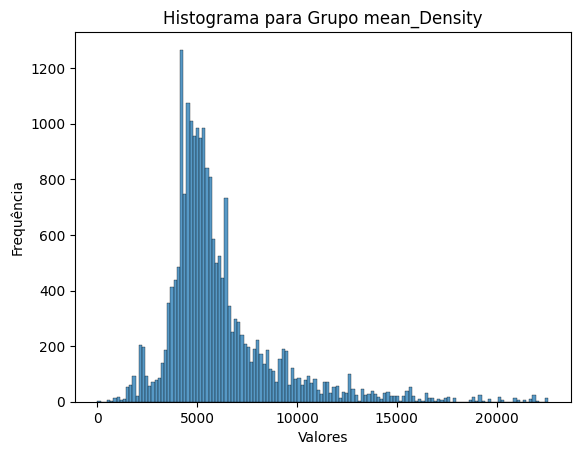

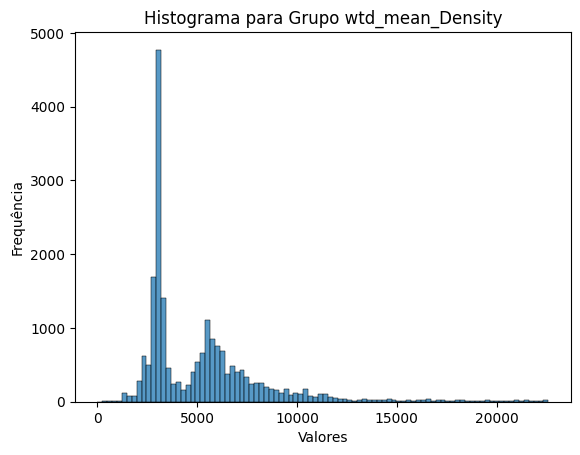

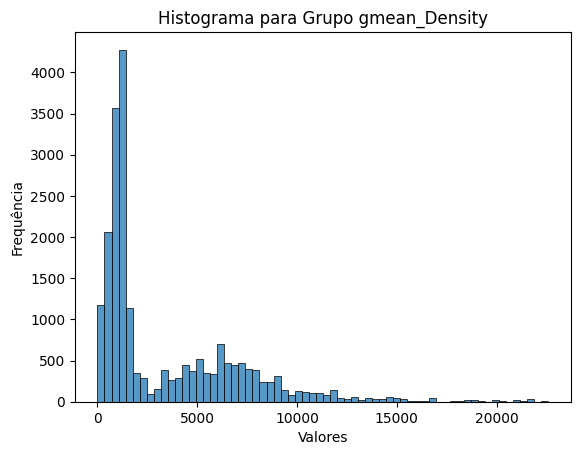

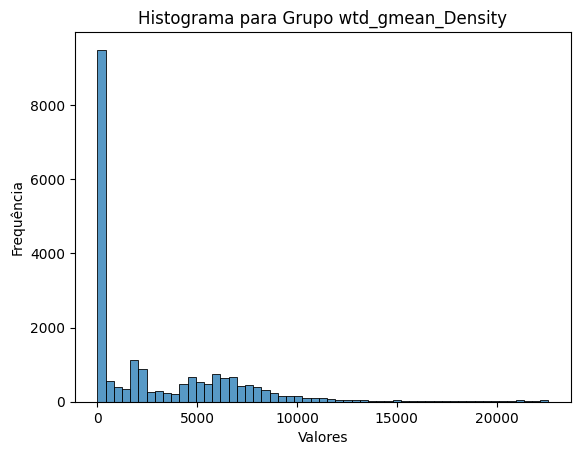

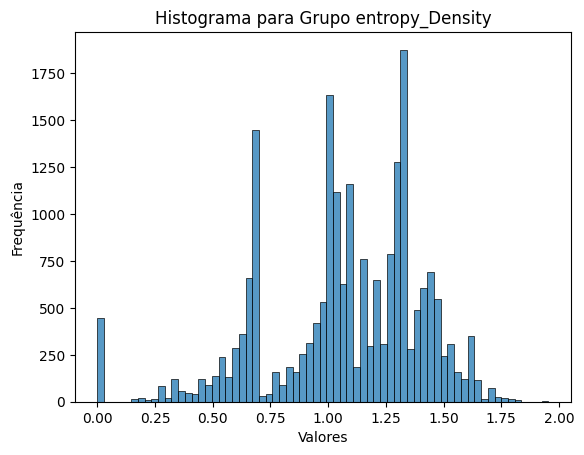

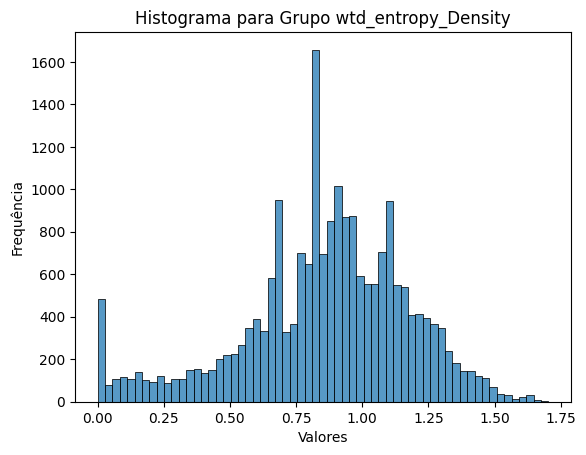

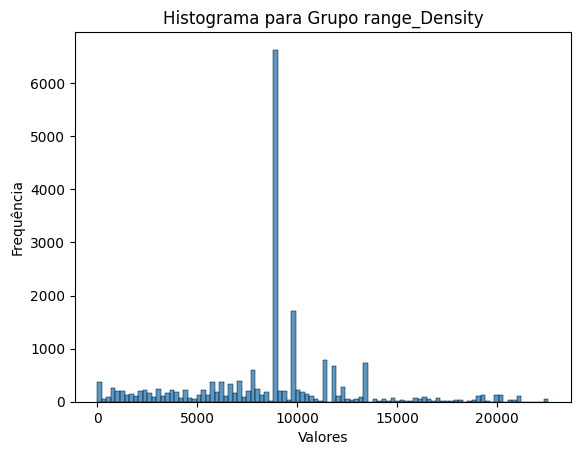

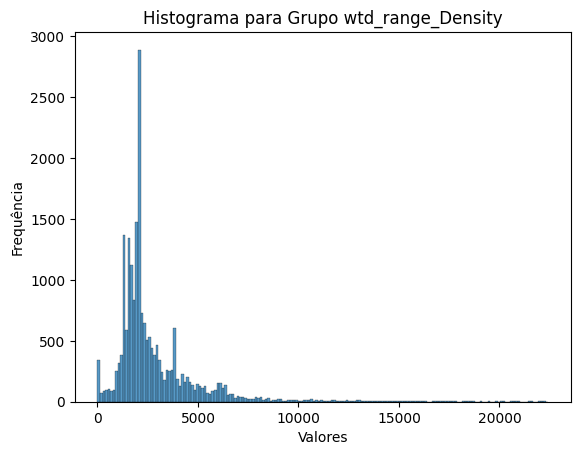

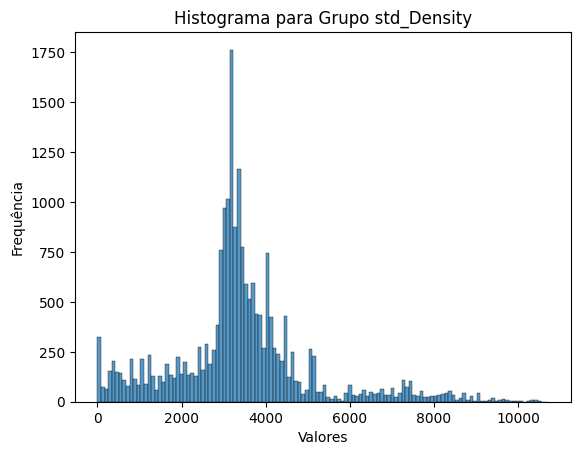

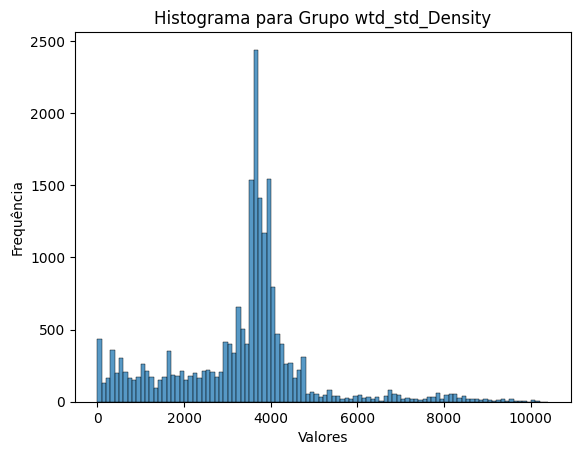

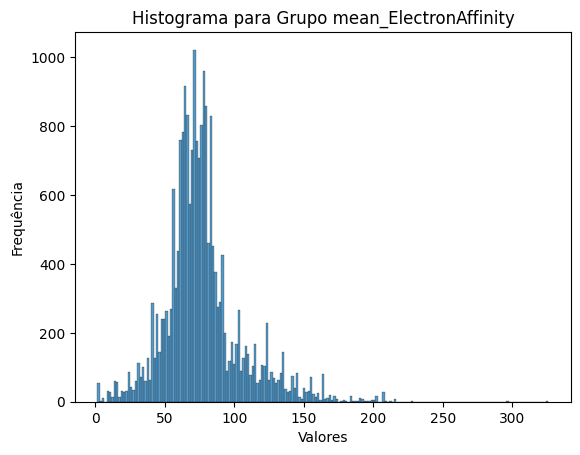

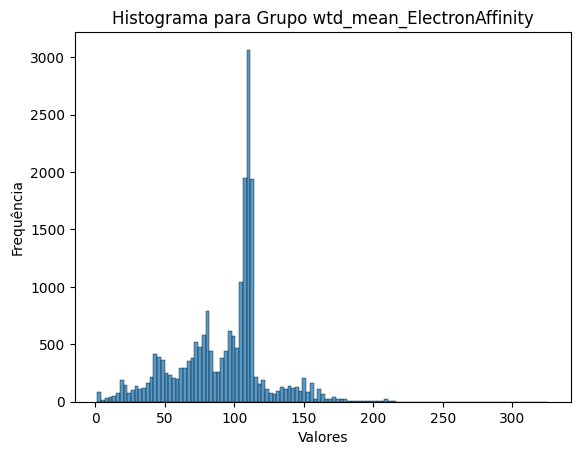

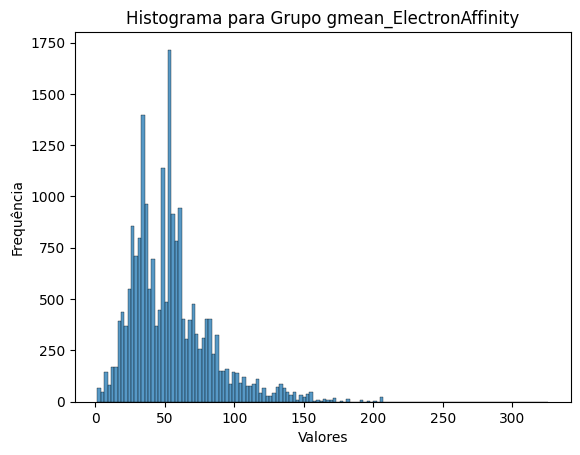

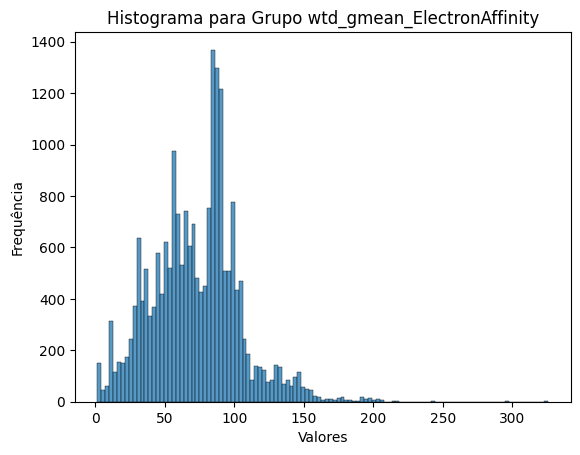

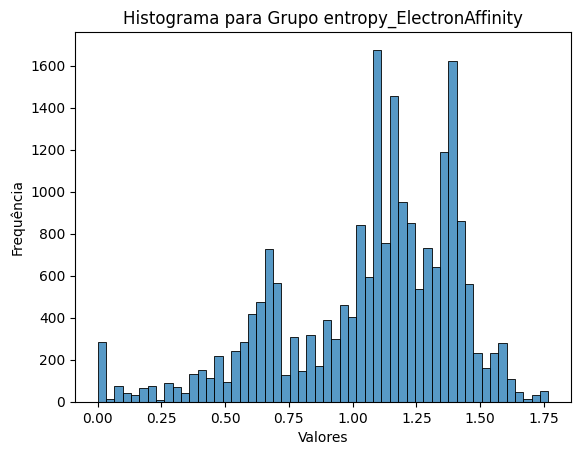

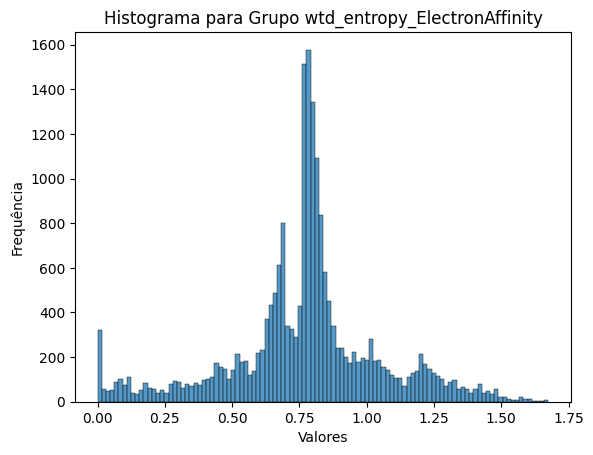

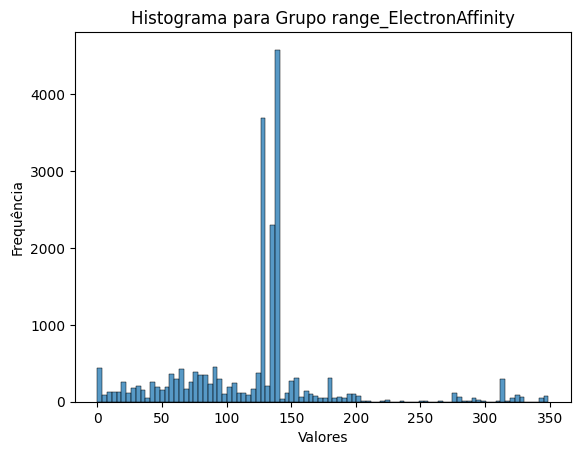

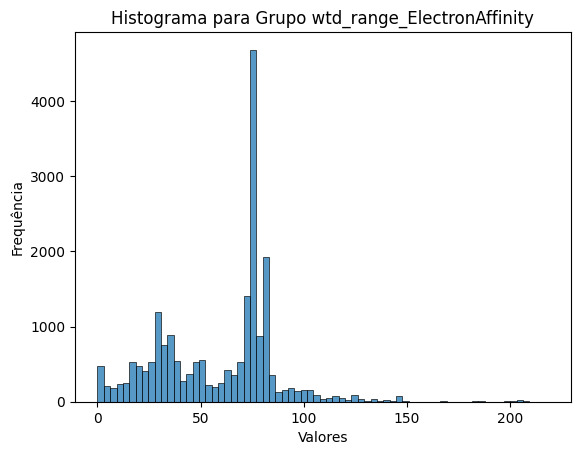

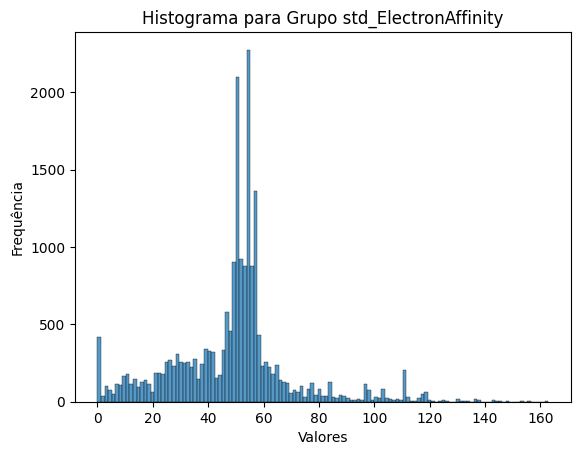

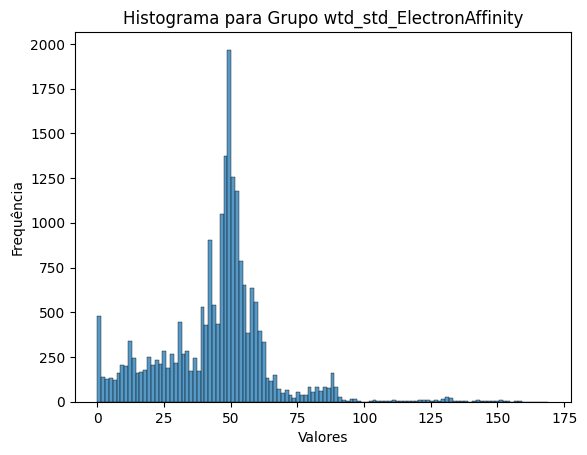

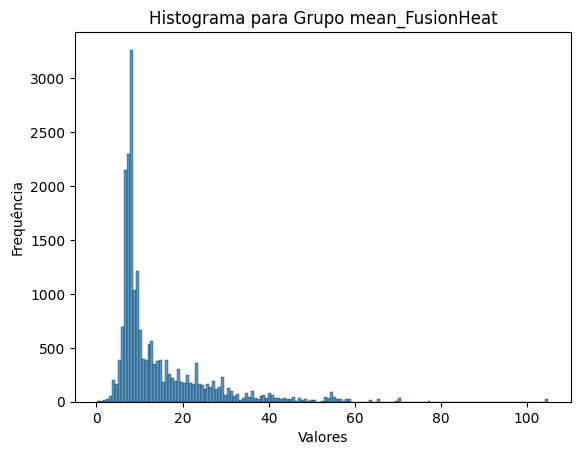

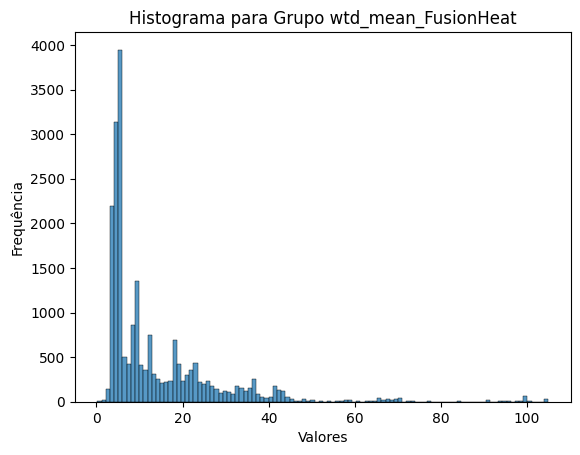

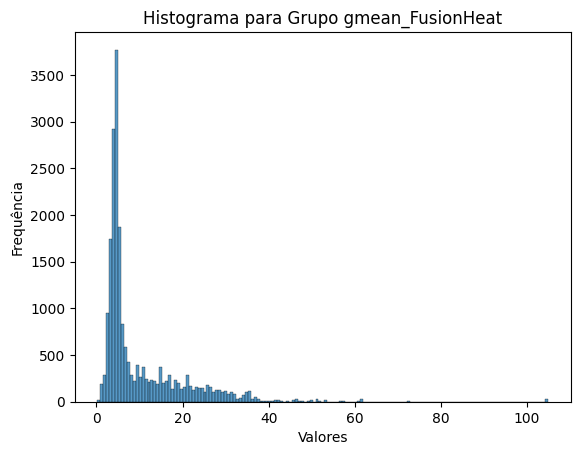

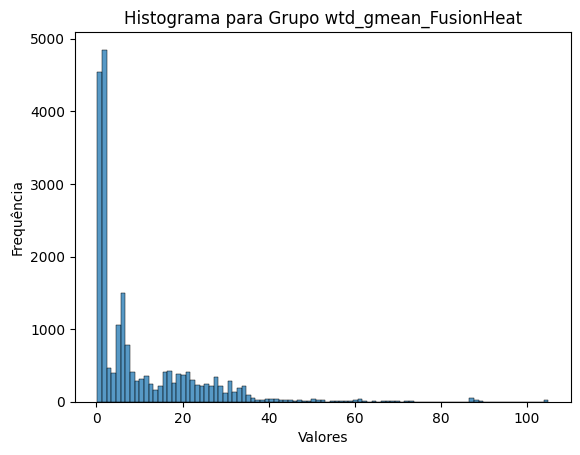

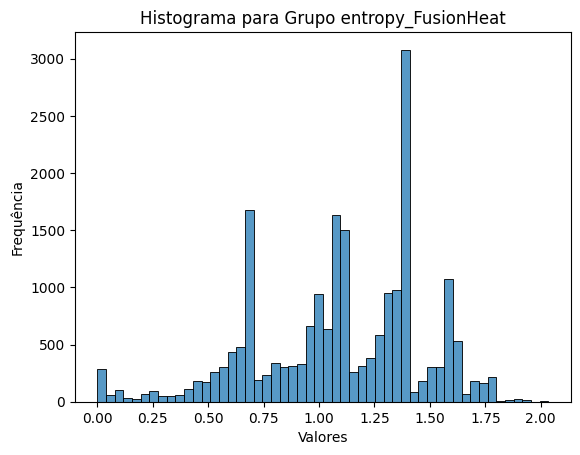

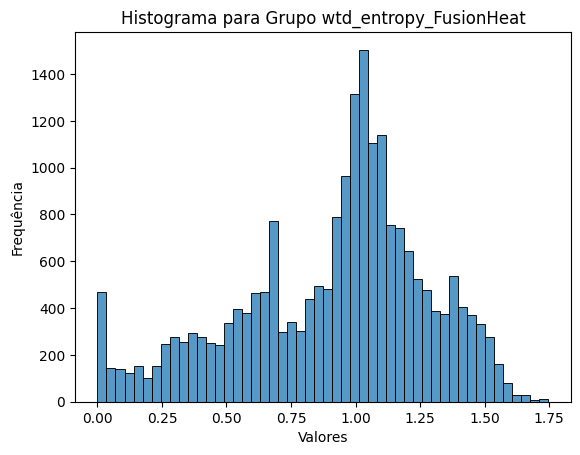

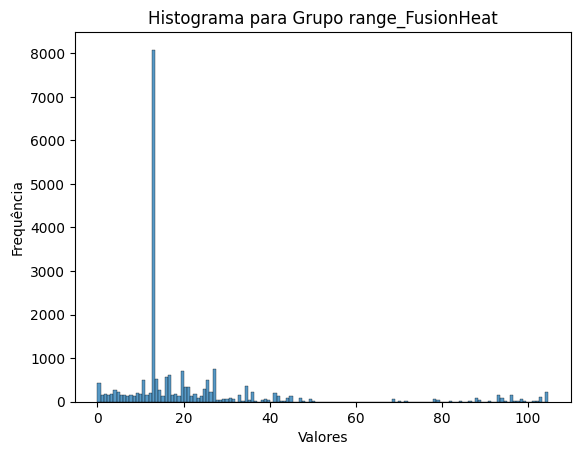

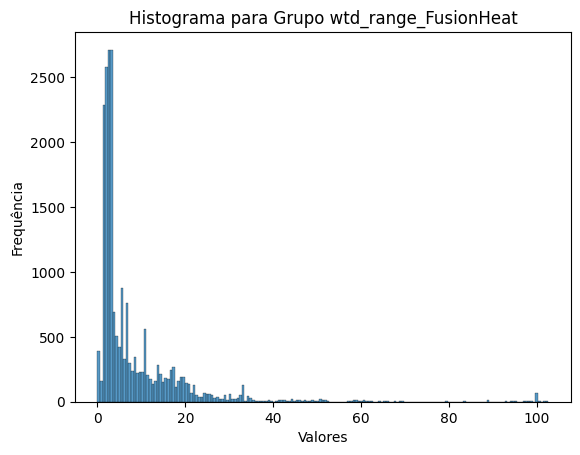

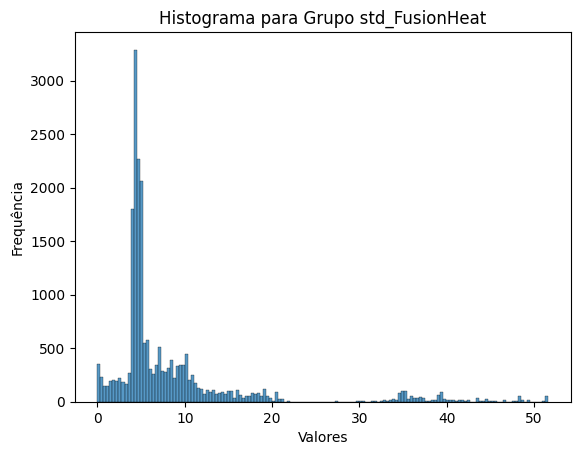

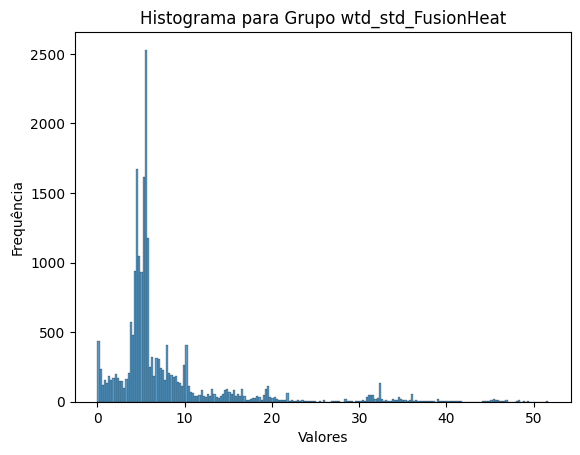

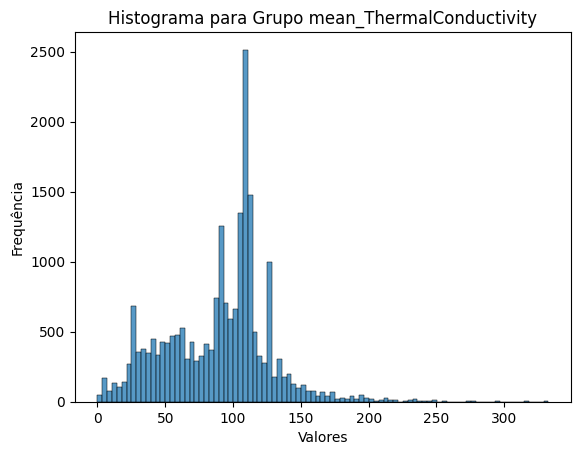

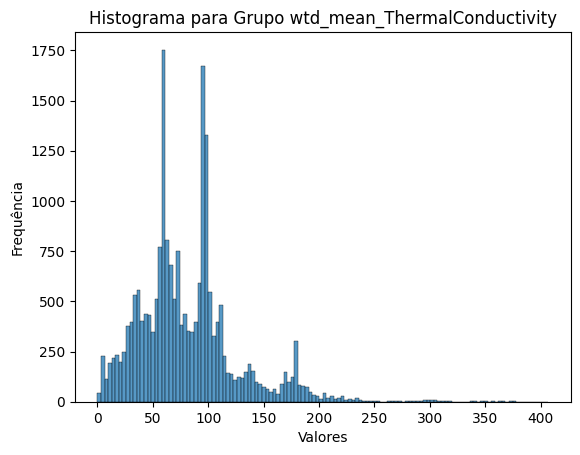

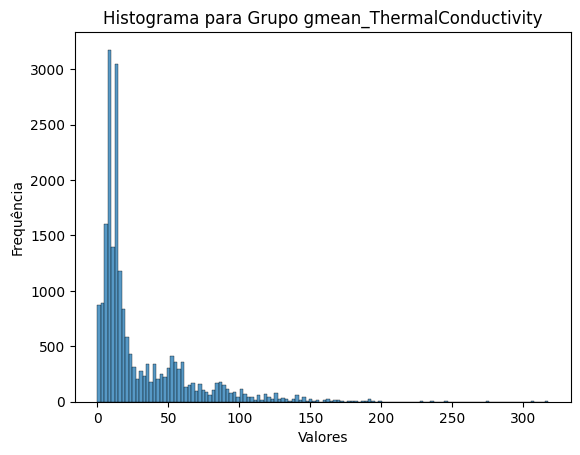

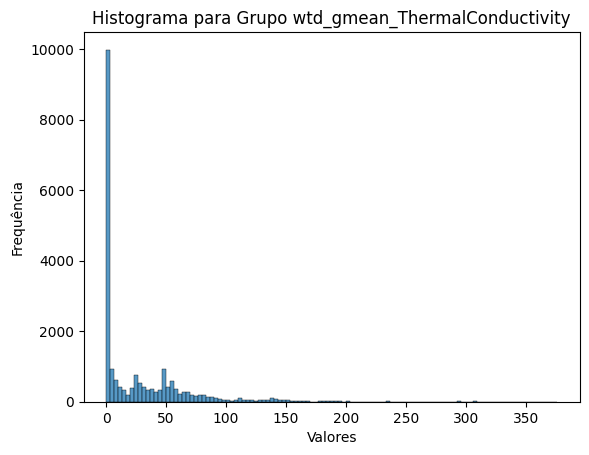

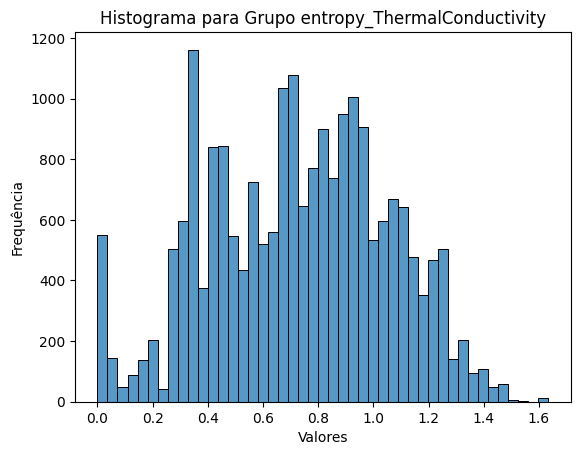

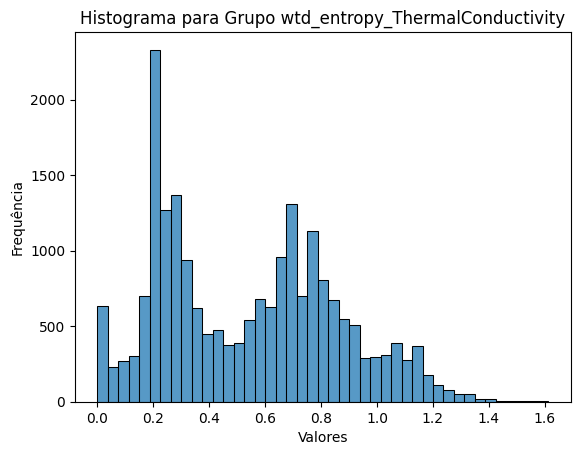

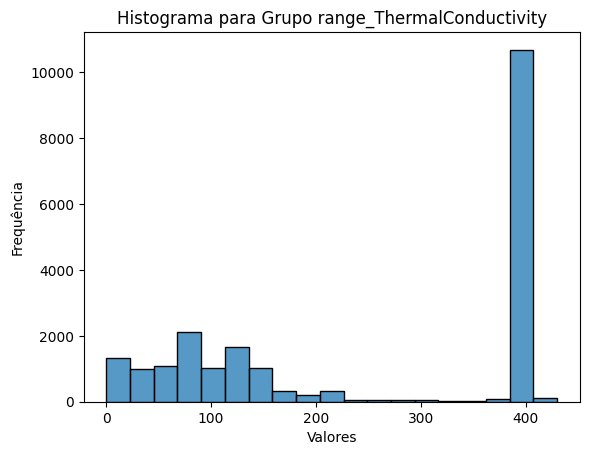

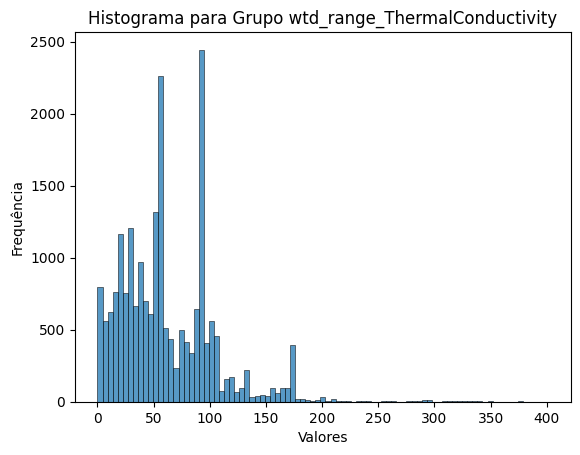

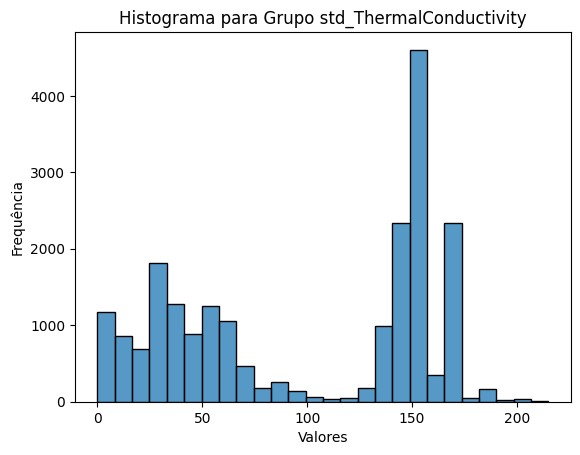

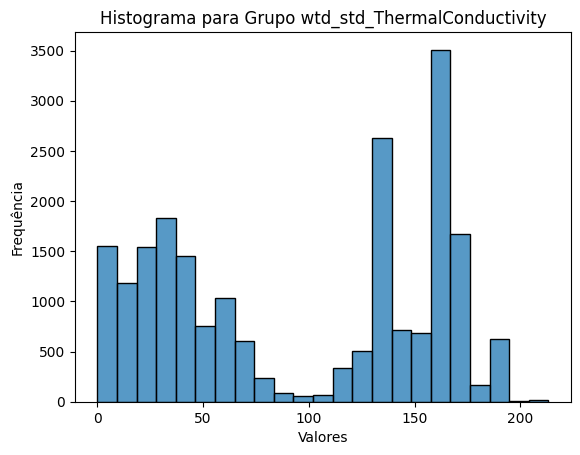

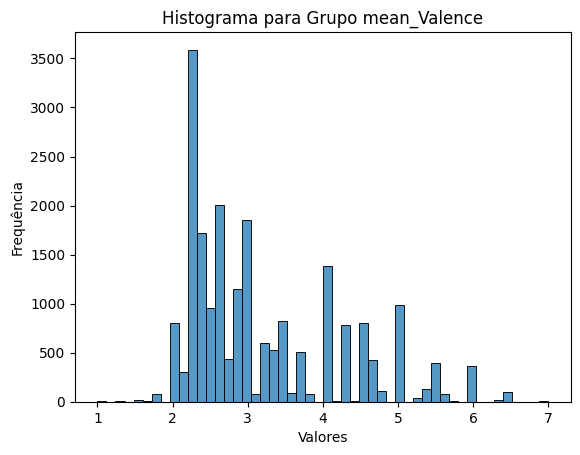

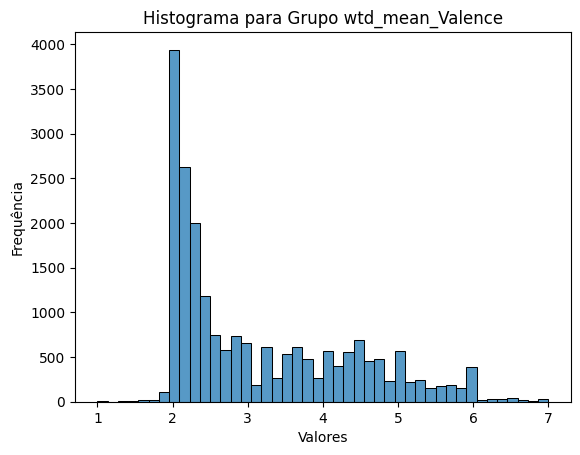

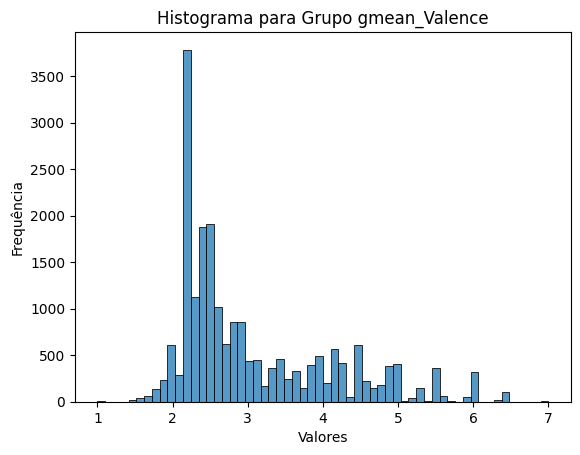

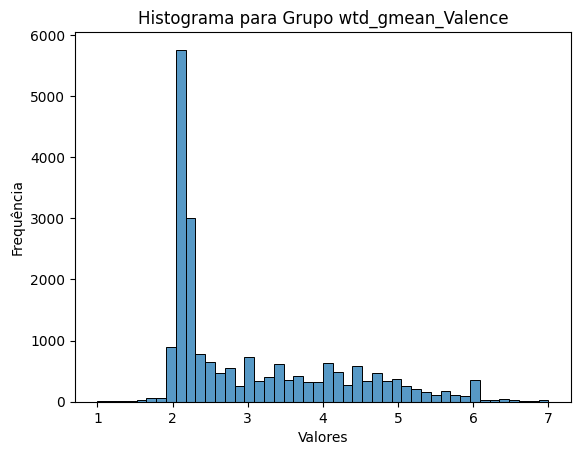

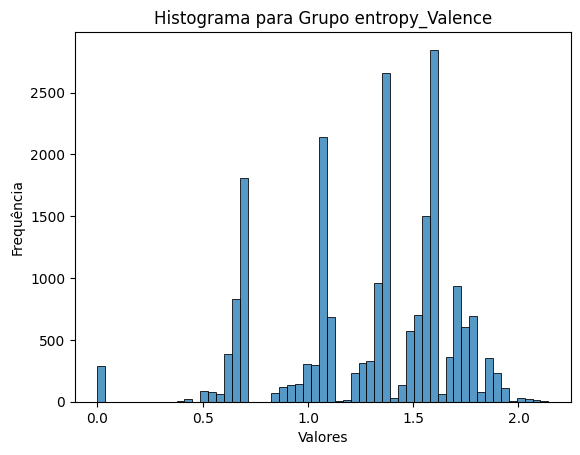

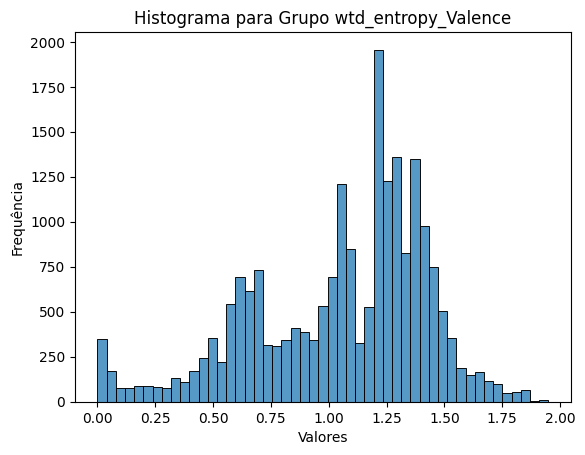

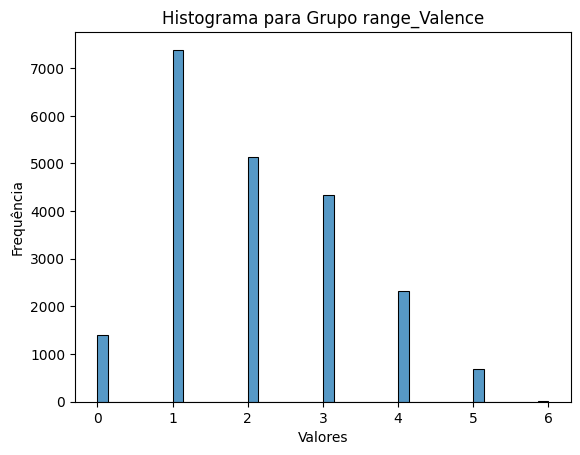

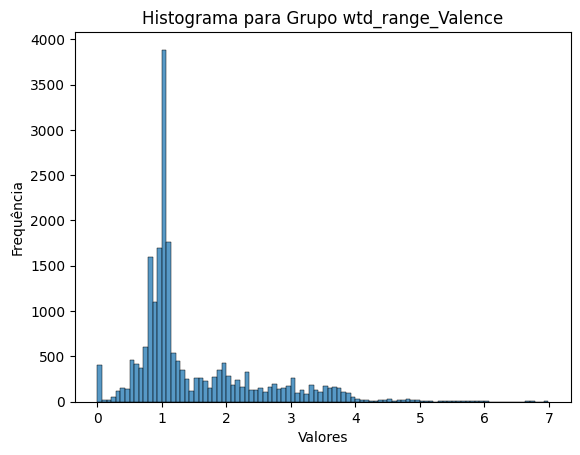

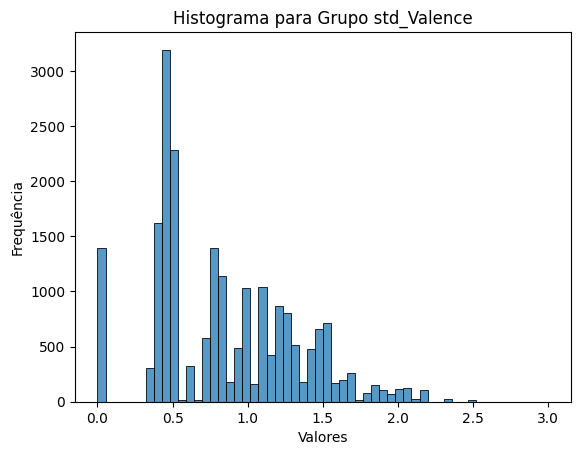

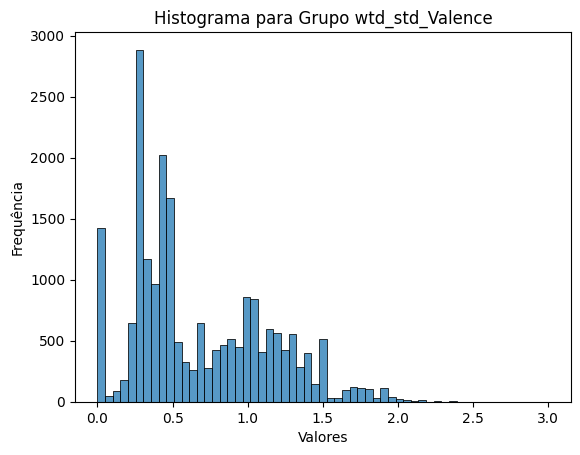

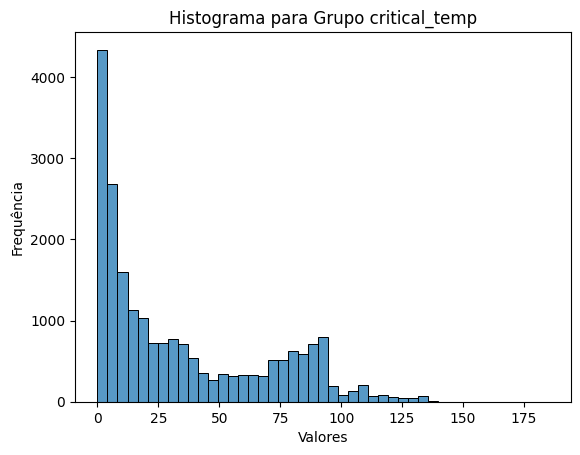

In [12]:
for coluna in superconductors_dataset.columns:
    plt.figure()
    sns.histplot(superconductors_dataset[coluna])
    plt.title(f'Histograma para Grupo {coluna}')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')


### Plots de espalhamento

Os plots de espalhamento são importantes para melhor visualizar a correlação entre duas variáveis no dataset, abaixo mostramos 1 exemplo de cada classificação de correlação (positiva, zero ou negativa).

#### Amostras de variáveis com correlações positivas

<AxesSubplot: xlabel='mean_Valence', ylabel='gmean_Valence'>

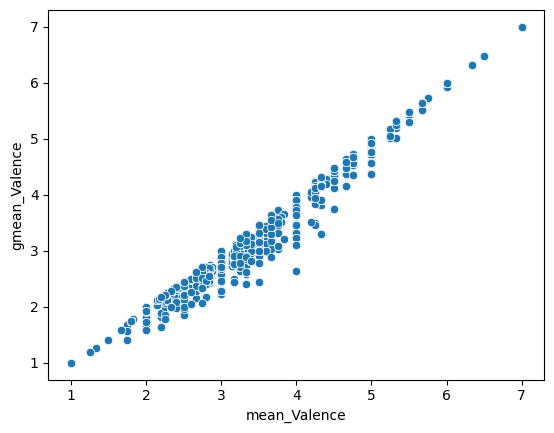

In [13]:
sns.scatterplot(data=superconductors_dataset, x="mean_Valence", y="gmean_Valence")

#### Amostras de variáveis com correlações positivas

<AxesSubplot: xlabel='gmean_Density', ylabel='std_Valence'>

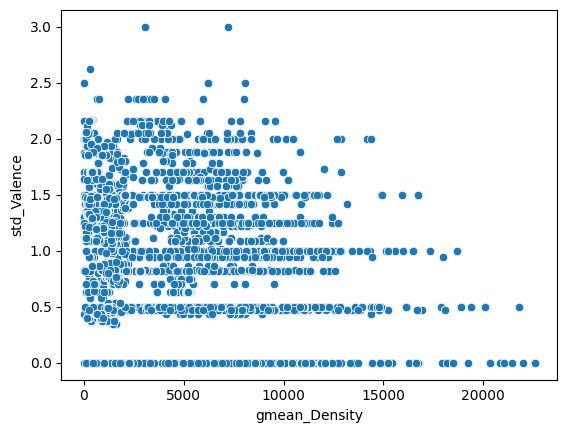

In [14]:
sns.scatterplot(data=superconductors_dataset, x="gmean_Density", y="std_Valence")

#### Amostras de variáveis com correlações (próximas à) negativas

<AxesSubplot: xlabel='wtd_gmean_atomic_radius', ylabel='range_atomic_radius'>

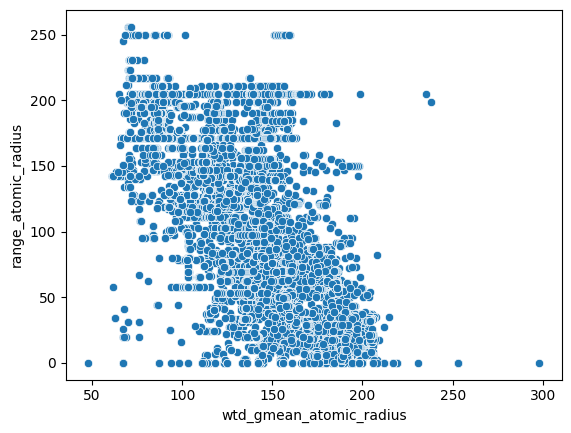

In [15]:
sns.scatterplot(data=superconductors_dataset, x="wtd_gmean_atomic_radius", y="range_atomic_radius")

### Discussão e Separação Features e Target

A partir de uma análise minusciósa sobre o dataset e seus respectivos artigos,  tornou-se claro que o alvo de maioria das coluna era proporcionar informações suficientes para previsão da temperatura crítica do supercondutor, esses valores estão disponíveis na última coluna do dataset "critical_temp"

In [16]:
a = superconductors_dataset.columns
a = np.array(a)
a = a[:-1]
a

array(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass',
       'entropy_atomic_mass', 'wtd_entropy_atomic_mass',
       'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass',
       'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'gmean_fie',
       'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie',
       'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius',
       'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius',
       'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density',
       'gmean_Density', 'wtd_gmean_Density', 'entropy_Density',
       'wtd_entropy_Density', 'range_Density', 'wtd_range_Density',
       'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity',
       'wtd_mean_ElectronAffinity', 

In [17]:
list_one = np.array(superconductors_dataset.columns)
list_features = np.array(list_one[:-1])
list_target = ["critical_temp"]

In [18]:
y = superconductors_dataset.reindex(list_target, axis=1)
y

,critical_temp
0,29.00
1,26.00
2,19.00
3,22.00
4,23.00
...,...
21258,2.44
21259,122.10
21260,1.98
21261,1.84


In [19]:
X = superconductors_dataset.reindex(list_features, axis=1)
X

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.25,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.20,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.50,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.50,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493


### Seleção pelo limiar da variância

Abaixo utilizamos as variâncias dos atributos para remover os que tiverem esse valor abaixo de 0.5

In [20]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.1, random_state=42)

In [21]:
from sklearn.feature_selection import VarianceThreshold

print(np.var(X, axis=0))

number_of_elements          2.071472
mean_atomic_mass          880.653071
wtd_mean_atomic_mass     1121.554560
gmean_atomic_mass         962.832476
wtd_gmean_atomic_mass    1343.237507
                            ...     
wtd_entropy_Valence         0.144614
range_Valence               1.543349
wtd_range_Valence           0.956784
std_Valence                 0.234900
wtd_std_Valence             0.207544
Length: 81, dtype: float64


In [22]:
variancia_minima = 0.5

redutor = VarianceThreshold(variancia_minima)

redutor.fit(X)

X_modificado = redutor.transform(X)

X_modificado

array([[ 4.        , 88.9444675 , 57.86269229, ...,  2.21978343,
         1.        ,  1.08571429],
       [ 5.        , 92.729214  , 58.51841614, ...,  2.21067941,
         2.        ,  1.12857143],
       [ 4.        , 88.9444675 , 57.88524186, ...,  2.23267852,
         1.        ,  1.11428571],
       ...,
       [ 2.        , 99.66319   , 95.609104  , ...,  4.7817625 ,
         1.        ,  3.2       ],
       [ 2.        , 99.66319   , 97.0956022 , ...,  4.66581914,
         1.        ,  2.21      ],
       [ 3.        , 87.46833333, 86.8585    , ...,  4.24264069,
         3.        ,  1.8       ]])

In [23]:

features_selecionadas = redutor.get_support()

novo_nome_features = X.columns[features_selecionadas]

X_1 = pd.DataFrame(X_modificado, columns=novo_nome_features)



In [24]:
X_1

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,...,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,range_Valence,wtd_range_Valence
0,4.0,88.944468,57.862692,66.361592,36.116612,122.90607,31.794921,51.968828,53.622535,775.425000,...,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.0,1.085714
1,5.0,92.729214,58.518416,73.132787,36.396602,122.90607,36.161939,47.094633,53.979870,766.440000,...,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,2.0,1.128571
2,4.0,88.944468,57.885242,66.361592,36.122509,122.90607,35.741099,51.968828,53.656268,775.425000,...,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.0,1.114286
3,4.0,88.944468,57.873967,66.361592,36.119560,122.90607,33.768010,51.968828,53.639405,775.425000,...,399.97342,57.127669,168.854244,138.528893,2.25,2.264286,2.213364,2.226222,1.0,1.100000
4,4.0,88.944468,57.840143,66.361592,36.110716,122.90607,27.848743,51.968828,53.588771,775.425000,...,399.97342,57.127669,168.854244,138.493671,2.25,2.242857,2.213364,2.206963,1.0,1.057143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4.0,106.957877,53.095769,82.515384,43.135565,146.88130,15.504479,65.764081,43.202659,661.775000,...,134.00000,83.048889,55.056789,46.595943,3.25,3.555556,3.223710,3.519911,1.0,2.168889
21259,5.0,92.266740,49.021367,64.812662,32.867748,188.38390,7.353333,69.232655,50.148287,747.780000,...,399.97342,76.176553,151.164639,156.558695,2.20,2.047619,2.168944,2.038991,1.0,0.904762
21260,2.0,99.663190,95.609104,99.433882,95.464320,13.51362,53.041104,6.756810,5.405448,733.550000,...,17.00000,29.000000,8.500000,6.800000,4.50,4.800000,4.472136,4.781762,1.0,3.200000
21261,2.0,99.663190,97.095602,99.433882,96.901083,13.51362,31.115202,6.756810,6.249958,733.550000,...,17.00000,15.250000,8.500000,7.862385,4.50,4.690000,4.472136,4.665819,1.0,2.210000


### Seleção pelo VIF

In [25]:
from sklearn.linear_model import LinearRegression


def selecao_vif(df_atributos, limiar_vif):
    """Realiza a seleção de atributos por VIF.

    Args:
      df_atributos: DataFrame contendo os atributos.
      limiar_vf: valor do limiar do vif. Número positivo. Usualmente é 5 ou 10.

    Returns:
      DataFrame com os atributos selecionados.
    """

    df = df_atributos.copy()

    while True:
        VIFs = []

        for col in df.columns:
            X = df.drop(col, axis=1).values
            y = df[col].values

            r_quadrado = LinearRegression().fit(X, y).score(X, y)

            if r_quadrado != 1:
                VIF = 1 / (1 - r_quadrado)
            else:
                VIF = float("inf")

            VIFs.append(VIF)

        VIF_maximo = max(VIFs)

        if VIF_maximo > limiar_vif:
            indice = VIFs.index(VIF_maximo)
            coluna_remocao = df.columns[indice]
            df = df.drop(coluna_remocao, axis=1)
        else:
            break

    return df

In [26]:
X_2 = selecao_vif(X, 10)

In [27]:
X_2

,mean_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,gmean_fie,wtd_range_fie,mean_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_entropy_Density,range_Density,...,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,wtd_range_ThermalConductivity,gmean_Valence,range_Valence,wtd_range_Valence,wtd_std_Valence
0,88.944468,31.794921,51.968828,718.152900,735.985714,160.250000,42.914286,75.237540,0.814598,8958.571,...,4.666920,107.756645,0.621979,0.308148,0.262848,57.127669,2.213364,1,1.085714,0.437059
1,92.729214,36.161939,47.094633,720.605511,743.164286,161.200000,50.571429,67.321319,0.914802,10488.571,...,4.603000,172.205316,0.619735,0.847404,0.567706,51.413383,1.888175,2,1.128571,0.468606
2,88.944468,35.741099,51.968828,718.152900,743.164286,160.250000,49.314286,75.237540,0.760305,8958.571,...,4.649635,107.756645,0.619095,0.308148,0.250477,57.127669,2.213364,1,1.114286,0.444697
3,88.944468,33.768010,51.968828,718.152900,739.575000,160.250000,46.114286,75.237540,0.788889,8958.571,...,4.658301,107.756645,0.620535,0.308148,0.257045,57.127669,2.213364,1,1.100000,0.440952
4,88.944468,27.848743,51.968828,718.152900,728.807143,160.250000,36.514286,75.237540,0.859811,8958.571,...,4.684014,107.756645,0.624878,0.308148,0.272820,57.127669,2.213364,1,1.057143,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,106.957877,15.504479,65.764081,651.611213,427.546667,176.500000,57.808889,45.883003,1.110551,7511.000,...,17.657417,65.500000,95.001493,1.029002,0.634332,83.048889,3.223710,1,2.168889,0.496904
21259,92.266740,7.353333,69.232655,702.115184,659.771429,159.200000,20.285714,67.211309,1.080432,11848.571,...,5.204855,132.805316,1.577047,0.949904,0.745515,76.176553,2.168944,1,0.904762,0.212959
21260,99.663190,53.041104,6.756810,730.207231,370.180000,183.500000,124.600000,14.500000,0.572700,3453.000,...,4.040000,62.500000,57.038314,0.683870,0.559446,29.000000,4.472136,1,3.200000,0.400000
21261,99.663190,31.115202,6.756810,730.207231,208.799000,183.500000,84.230000,14.500000,0.667210,3453.000,...,4.671182,62.500000,58.781651,0.683870,0.659671,15.250000,4.472136,1,2.210000,0.462493


In [28]:
superconductors_dataset_2 = superconductors_dataset.reindex(list(X_2.columns) + list(y.columns), axis=1)

In [29]:
superconductors_dataset_2

,mean_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,gmean_fie,wtd_range_fie,mean_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_entropy_Density,range_Density,...,mean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,wtd_range_ThermalConductivity,gmean_Valence,range_Valence,wtd_range_Valence,wtd_std_Valence,critical_temp
0,88.944468,31.794921,51.968828,718.152900,735.985714,160.250000,42.914286,75.237540,0.814598,8958.571,...,107.756645,0.621979,0.308148,0.262848,57.127669,2.213364,1,1.085714,0.437059,29.00
1,92.729214,36.161939,47.094633,720.605511,743.164286,161.200000,50.571429,67.321319,0.914802,10488.571,...,172.205316,0.619735,0.847404,0.567706,51.413383,1.888175,2,1.128571,0.468606,26.00
2,88.944468,35.741099,51.968828,718.152900,743.164286,160.250000,49.314286,75.237540,0.760305,8958.571,...,107.756645,0.619095,0.308148,0.250477,57.127669,2.213364,1,1.114286,0.444697,19.00
3,88.944468,33.768010,51.968828,718.152900,739.575000,160.250000,46.114286,75.237540,0.788889,8958.571,...,107.756645,0.620535,0.308148,0.257045,57.127669,2.213364,1,1.100000,0.440952,22.00
4,88.944468,27.848743,51.968828,718.152900,728.807143,160.250000,36.514286,75.237540,0.859811,8958.571,...,107.756645,0.624878,0.308148,0.272820,57.127669,2.213364,1,1.057143,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,106.957877,15.504479,65.764081,651.611213,427.546667,176.500000,57.808889,45.883003,1.110551,7511.000,...,65.500000,95.001493,1.029002,0.634332,83.048889,3.223710,1,2.168889,0.496904,2.44
21259,92.266740,7.353333,69.232655,702.115184,659.771429,159.200000,20.285714,67.211309,1.080432,11848.571,...,132.805316,1.577047,0.949904,0.745515,76.176553,2.168944,1,0.904762,0.212959,122.10
21260,99.663190,53.041104,6.756810,730.207231,370.180000,183.500000,124.600000,14.500000,0.572700,3453.000,...,62.500000,57.038314,0.683870,0.559446,29.000000,4.472136,1,3.200000,0.400000,1.98
21261,99.663190,31.115202,6.756810,730.207231,208.799000,183.500000,84.230000,14.500000,0.667210,3453.000,...,62.500000,58.781651,0.683870,0.659671,15.250000,4.472136,1,2.210000,0.462493,1.84


In [30]:
file_path = "sp2.csv"

# Save the DataFrame to a CSV file
superconductors_dataset_2.to_csv(file_path, index=False)

#### Seleção por PCA

In [31]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


In [33]:
# Create PCA instance
pca = PCA()

# Fit and transform the data
X_pca = pca.fit_transform(X_standardized)


In [34]:
# Determine the number of components to retain based on explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Use the desired number of components
pca = PCA(n_components=num_components)
X_selected = pca.fit_transform(X_standardized)


In [35]:
# Inspect the features contributing to each principal component
selected_features = pca.components_
print("Selected Features:")
selected_features


Selected Features:


array([[-0.15577833,  0.05181305,  0.09916962, ...,  0.10791722,
        -0.00838945,  0.0036008 ],
       [-0.09185596, -0.22647459, -0.19990777, ..., -0.0094412 ,
         0.02976756,  0.02607288],
       [-0.07519712, -0.00733432, -0.05508066, ..., -0.04575529,
        -0.21004718, -0.23150079],
       ...,
       [ 0.07110298,  0.09297467, -0.0022361 , ...,  0.09908585,
         0.07294239,  0.08299029],
       [-0.06820043, -0.02375944,  0.09084188, ..., -0.04189808,
         0.09760389,  0.15630603],
       [ 0.00309184,  0.19413437, -0.07415774, ...,  0.07302498,
         0.05719066, -0.12846043]])

### References:

[1] https://pt.wikipedia.org/wiki/Supercondutividade <br>
[2] https://www.nims.go.jp/eng/research/group/superconducting-system/ <br>
[3] https://www.kaggle.com/datasets/anlgrbz/super-conductors <br>
[4] https://www.geeksforgeeks.org/insert-image-in-a-jupyter-notebook/ <br>
[5] A Data-Driven Statistical Model for Predicting the Critical
Temperature of a Superconductor, Kam Hamidiech, University of Pensylvania, 2018 <br>
[6] https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python <br>
[7] https://stackoverflow.com/questions/32932866/how-to-remove-the-last-element-from-1-dimensional-array